# RSA Analysis 
Comparing BART output with activity in BA10.

In this doc we will only work with pymvpa betas. And go more in depth as to what's driving the correlations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == 'darwin':
    cfg = os.path.join("/Users", "njchiang", "CloudStation", "Grad",
                       "Research", "montilab-ucla", "analogy", "config", "project.json")
    plat = "osx"

elif sys.platform == "linux":
    import platform
    if platform.linux_distribution()[0] == "debian":
        cfg = os.path.join("/home", "njchiang", "data", "CloudStation", "Grad",
                           "Research", "montilab-ucla", "analogy", "config", "project.json")
        plat = "linux"
    else:
        cfg = os.path.join("/u", "project", "monti", "Analysis", "Analogy",
                           "code", "analogy", "config", "project.json")
        plat = "hoff"
else:
    cfg = os.path.join("D:\\", "CloudStation", "Grad",
                       "Research", "montilab-ucla", "analogy", "config", "project.json")
    plat = "win"

with open(cfg, "r") as f:
    projectSettings = json.load(f)

paths = projectSettings["filepaths"]["{}Paths".format(plat)]
sys.path.append(paths["github"])
sys.path.append(paths["code"])

In [3]:
from fmri.analogy_utils import analysisSettings, contrastSettings, order, \
    pu, pa, pv, compile_models, rsa, save_rois, load_rois


Loading JSON config from D:\CloudStation\Grad\Research\montilab-ucla\analogy\config\analyses.json
Loading JSON config from D:\CloudStation\Grad\Research\montilab-ucla\analogy\config\contrasts.json
Loading label file from: D:\CloudStation\Grad\Research\montilab-ucla\analogy\labels\trialorder_rsa_absorted.csv


## Models

Loading in models from mat files


In [4]:
from fmri.analogy_rsa import  \
downsample_rdms_df_by_factor, create_models, models_to_df, plotmodels\
, roi_rdm, run_rsa_dfs, subject_rdms, plot_results, get_model_rdms, \
reduce_by_factor

In [5]:
# modelnames = ["rel", "humanratings", "w2vdiff", "rstpostprob9", "rstpostprob79", "numchar", "concatword", "typicality"]

modelnames = ["mainrel", "subrel", 
              "rel", "humanratings", "numchar", 
              "w2vdiff", "concatword", 
              "rstpostprob9", "rstpostprob79", 
              ["rstpostprob79", "concatword"] 
#               ["rel", "w2vdiff"], 
#               ["rstpostprob9", "concatword"],
#               ["rstpostprob9", "w2vdiff"]
             ]

# modelnames = ["mainrel", "subrel", "rel", "humanratings"]

raw_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
model_rdms = get_model_rdms(raw_models_df, modelnames)
model_rdms

Loading label file from: D:\CloudStation\Grad\Research\montilab-ucla\analogy\labels\raw_models.csv


,type,name,0,1,2,3,4,5,6,7,...,41318,41319,41320,41321,41322,41323,41324,41325,41326,41327
0,full,mainrel,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,full,subrel,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,full,rel,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
3,full,humanratings,1.110223e-16,3.456765e-04,3.456765e-04,2.766465e-06,2.766465e-06,1.883798e-05,1.883798e-05,3.297221e-05,...,6.416471e-05,6.416471e-05,2.558104e-05,2.558104e-05,0.000000e+00,8.717536e-06,8.717536e-06,8.717536e-06,8.717536e-06,0.000000e+00
4,full,numchar,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
5,full,w2vdiff,2.220446e-16,9.333585e-01,9.333585e-01,9.557922e-01,9.557922e-01,1.064554e+00,1.064554e+00,8.855721e-01,...,1.053615e+00,1.053615e+00,1.055370e+00,1.055370e+00,2.220446e-16,9.636183e-01,9.636183e-01,9.636183e-01,9.636183e-01,0.000000e+00
6,full,concatword,0.000000e+00,9.178494e-01,9.178494e-01,9.101928e-01,9.101928e-01,8.221301e-01,8.221301e-01,9.333544e-01,...,8.809809e-01,8.809809e-01,8.631256e-01,8.631256e-01,0.000000e+00,8.517704e-01,8.517704e-01,8.517704e-01,8.517704e-01,0.000000e+00
7,full,rstpostprob9,1.110223e-16,1.438243e-02,1.438243e-02,1.696986e-01,1.696986e-01,1.129309e-02,1.129309e-02,2.790716e-02,...,2.004162e-01,2.004162e-01,5.986077e-02,5.986077e-02,0.000000e+00,2.267369e-01,2.267369e-01,2.267369e-01,2.267369e-01,0.000000e+00
8,full,rstpostprob79,1.110223e-16,1.420752e-01,1.420752e-01,2.476321e-01,2.476321e-01,1.672532e-01,1.672532e-01,1.220956e-01,...,3.427279e-01,3.427279e-01,1.810736e-01,1.810736e-01,1.110223e-16,4.030399e-01,4.030399e-01,4.030399e-01,4.030399e-01,0.000000e+00
9,full,'rstpostprob79'+'concatword',1.110223e-16,5.649513e-01,5.649513e-01,6.353464e-01,6.353464e-01,5.252475e-01,5.252475e-01,5.725416e-01,...,7.545284e-01,7.545284e-01,5.682479e-01,5.682479e-01,2.220446e-16,7.349043e-01,7.349043e-01,7.349043e-01,7.349043e-01,0.000000e+00


Loading label file from: D:\CloudStation\Grad\Research\montilab-ucla\analogy\labels\raw_models.csv


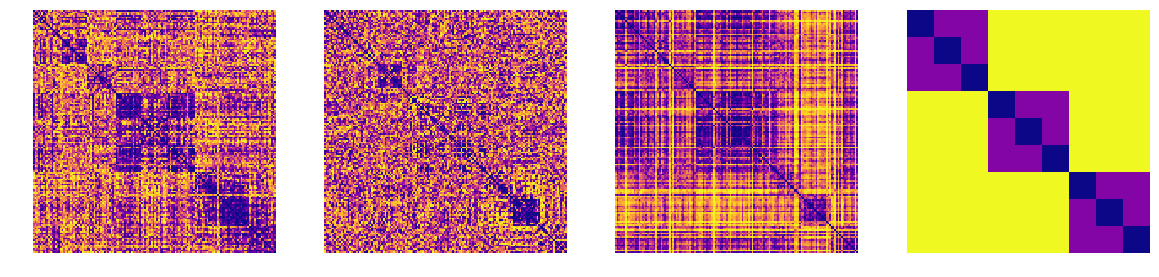

In [53]:
# model_figure
# plotmodels_old(models, save=False)

modelnames = ["concatword", "w2vdiff", "rstpostprob79", "rel"]

raw_vis_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
vis_model_rdms = get_model_rdms(raw_vis_models_df, modelnames)



f = plt.figure(figsize=(20,10))
axarr = f.subplots(1, len(vis_model_rdms.name.unique()))
rdms = vis_model_rdms[vis_model_rdms.type == "avg"]
for j, m in enumerate(vis_model_rdms.name.unique()):
    pv.plot_rdm(rdms[rdms.name==m].iloc[:, 2:].dropna(axis=1),
           ax=axarr[j], cb=False, cmap="plasma")
#     axarr[j].set_title(m)
    axarr[j].set_axis_off()
    
f.savefig(os.path.join(paths["cloud"], "Figures", "rsa-models.png"))

In [9]:
masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
masks_dict

{'ba10': 'anat-left-ba10_mask',
 'ba44': 'anat-left-ba44_mask',
 'ba45': 'anat-left-ba45_mask',
 'ba46': 'anat-left-ba46_mask',
 'ba47': 'anat-left-ba47_mask',
 'lpstg': 'anat-left-pSTG_mask',
 'laitg': 'anat-left-aITG_mask',
 'lpmtg': 'anat-left-pMTG_mask',
 'ltp': 'anat-left-temporalpole_mask',
 'ltomtg': 'anat-left-toMTG_mask',
 'lastg': 'anat-left-aSTG_mask',
 'lspl': 'anat-left-SPL_mask',
 'psmg': 'anat-left-pSMG_mask',
 'asmg': 'anat-left-aSMG_mask',
 'lag': 'anat-left-newAG_mask',
 'v1': 'anat-v1_mask',
 'csf': 'csf-bin_mask'}

## Loading betas

Loading sub-01 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-01\rois\sub-01_cope-LSS_labels.csv
Loading sub-02 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-02\rois\sub-02_cope-LSS_labels.csv
Loading sub-03 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-03\rois\sub-03_cope-LSS_labels.csv
Loading sub-04 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-04\rois\sub-04_cope-LSS_labels.csv
Loading sub-05 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-05\rois\sub-05_cope-LSS_labels.csv
Loading sub-06 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-06\rois\sub-06_cope-LSS_labels.csv
Loading sub-07 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-07\rois\sub-07_cope-LSS_labels.csv
Loading sub-08 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-08\rois\sub-08_cope-LSS_labels.csv
Loading sub-09 betas
Loading label file from: D:\fmri\Analogy\derivatives\sub-09\rois\sub-09_cop

Loading label file from: D:\fmri\Analogy\derivatives\sub-03\func\sub-03_task-analogy_run-08_events.csv
Concatenating 8 images
Reading file from: D:\fmri\Analogy\derivatives\sub-03\reg\BOLD_template.nii.gz
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-ba10_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-ba44_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-ba45_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-ba46_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-ba47_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-pSTG_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-aITG_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-03\masks\anat-left-pMTG_mask.nii.gz
A

Loading label file from: D:\fmri\Analogy\derivatives\sub-06\func\sub-06_task-analogy_run-07_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-06\func\sub-06_task-analogy_run-08_events.csv
Concatenating 8 images
Reading file from: D:\fmri\Analogy\derivatives\sub-06\reg\BOLD_template.nii.gz
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-ba10_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-ba44_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-ba45_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-ba46_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-ba47_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-pSTG_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-06\masks\anat-left-

Loading label file from: D:\fmri\Analogy\derivatives\sub-09\func\sub-09_task-analogy_run-06_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-09\func\sub-09_task-analogy_run-07_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-09\func\sub-09_task-analogy_run-08_events.csv
Concatenating 8 images
Reading file from: D:\fmri\Analogy\derivatives\sub-09\reg\BOLD_template.nii.gz
Reading file from: D:\fmri\Analogy\derivatives\sub-09\masks\anat-left-ba10_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-09\masks\anat-left-ba44_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-09\masks\anat-left-ba45_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-09\masks\anat-left-ba46_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-09\masks\anat-left-ba47_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-0

Loading label file from: D:\fmri\Analogy\derivatives\sub-12\func\sub-12_task-analogy_run-05_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-12\func\sub-12_task-analogy_run-06_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-12\func\sub-12_task-analogy_run-07_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-12\func\sub-12_task-analogy_run-08_events.csv
Concatenating 8 images
Reading file from: D:\fmri\Analogy\derivatives\sub-12\reg\BOLD_template.nii.gz
Reading file from: D:\fmri\Analogy\derivatives\sub-12\masks\anat-left-ba10_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-12\masks\anat-left-ba44_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-12\masks\anat-left-ba45_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-12\masks\anat-left-ba46_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy

Loading label file from: D:\fmri\Analogy\derivatives\sub-15\func\sub-15_task-analogy_run-04_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-15\func\sub-15_task-analogy_run-05_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-15\func\sub-15_task-analogy_run-06_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-15\func\sub-15_task-analogy_run-07_events.csv
centering image
Loading label file from: D:\fmri\Analogy\derivatives\sub-15\func\sub-15_task-analogy_run-08_events.csv
Concatenating 8 images
Reading file from: D:\fmri\Analogy\derivatives\sub-15\reg\BOLD_template.nii.gz
Reading file from: D:\fmri\Analogy\derivatives\sub-15\masks\anat-left-ba10_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-15\masks\anat-left-ba44_mask.nii.gz
Applying mask
Reading file from: D:\fmri\Analogy\derivatives\sub-15\masks\anat-left-ba45_mask.nii.gz
Applying mask
Reading file fro

[Text(0,0,'asmg'),
 Text(0,0,'ba10'),
 Text(0,0,'ba44'),
 Text(0,0,'ba45'),
 Text(0,0,'ba46'),
 Text(0,0,'ba47'),
 Text(0,0,'csf'),
 Text(0,0,'lag'),
 Text(0,0,'laitg'),
 Text(0,0,'lastg'),
 Text(0,0,'lpmtg'),
 Text(0,0,'lpstg'),
 Text(0,0,'lspl'),
 Text(0,0,'ltomtg'),
 Text(0,0,'ltp'),
 Text(0,0,'psmg'),
 Text(0,0,'v1')]

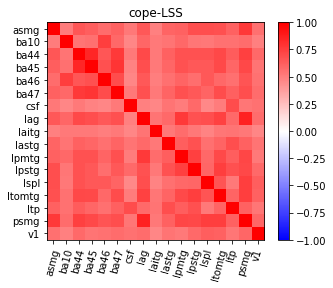

In [10]:
masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
# b = "cope-LSS"
# b = "cope-LSS-condensed"
# b = "tstat-subrel"
# b = "LSS-condensed"
# b = "tstat-LSS"
# b = "LSA"
# b = "pymvpa"

# metric="correlation"
metric="correlation"
try: 
    rois, labels = load_rois(b)
    full_rdms = subject_rdms(rois, labels, masks_dict, metric=metric, b=b)
except (FileNotFoundError, KeyError):
    save_rois(masks_dict, b)
    rois, labels = load_rois(b)
    full_rdms = subject_rdms(rois, labels, masks_dict, metric=metric, b=b)

    
# Relationship between ROIs:
f = plt.figure()
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, mode="corr", cb=True, cmap="bwr", scale=False, rank=False, vmin=-1, vmax=1)
ax.set_title(b)
roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)


In [11]:
rdms.head()

,type,name,0,1,2,3,4,5,6,7,...,41318,41319,41320,41321,41322,41323,41324,41325,41326,41327
0,avg,concatword,9.178494e-01,9.101928e-01,8.221301e-01,9.333544e-01,8.179570e-01,8.865194e-01,8.405514e-01,8.031837e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,avg,w2vdiff,9.333585e-01,9.557922e-01,1.064554e+00,8.855721e-01,8.490209e-01,1.062399e+00,7.271608e-01,7.789089e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,avg,rstpostprob79,1.420752e-01,2.476321e-01,1.672532e-01,1.220956e-01,1.005905e-01,2.884701e-01,1.638003e-01,1.264852e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,avg,rel,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


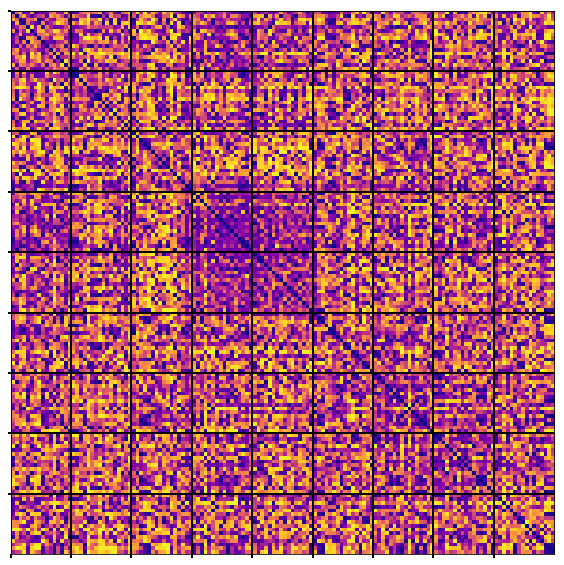

In [42]:
# visualize models
# plotmodels_old(models, save=False)
# f = plt.figure(figsize=(20,10))
# axarr = f.subplots(1, len(model_rdms.name.unique()))
ticks = np.arange(0, 144, 16) - 0.5

f = plt.figure(figsize=(10, 10))
ax = f.gca()
rdms = full_rdms
m = "ba47"
pv.plot_rdm(rdms.groupby(["betatype", "roi"]).mean().loc[b, m], ax=ax, cmap="plasma", cb=False)
# ax.set_title(m)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid(which="major", color="black", linestyle="-", linewidth=2)
    
f.savefig(os.path.join(paths["cloud"], "Figures", "{}-ba47-rdm.png".format(b)))

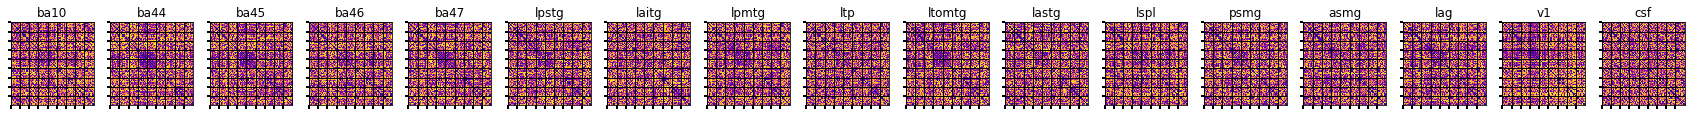

In [12]:
# visualize models
# plotmodels_old(models, save=False)
# f = plt.figure(figsize=(20,10))
# axarr = f.subplots(1, len(model_rdms.name.unique()))
ticks = np.arange(0, 144, 16) - 0.5

f, axarr = plt.subplots(1,len(masks_dict), figsize=(30, 10))
rdms = full_rdms
for i, m in enumerate(masks_dict):
    pv.plot_rdm(rdms.groupby(["betatype", "roi"]).mean().loc[b, m], ax=axarr[i], cmap="plasma", cb=False)
    axarr[i].set_title(m)
    axarr[i].xaxis.set_major_formatter(plt.NullFormatter())
    axarr[i].yaxis.set_major_formatter(plt.NullFormatter())
    axarr[i].xaxis.set_tick_params(width=2)
    axarr[i].yaxis.set_tick_params(width=2)
    axarr[i].set_xticks(ticks)
    axarr[i].set_yticks(ticks)
    axarr[i].grid(which="major", color="black", linestyle="-", linewidth=1)
    
f.savefig(os.path.join(paths["cloud"], "Figures", "{}-avg-rdms.png".format(b)))

## Visualization

[Text(0,0,'concatword'),
 Text(0,0,'w2vdiff'),
 Text(0,0,'rstpostprob79'),
 Text(0,0,'rel')]

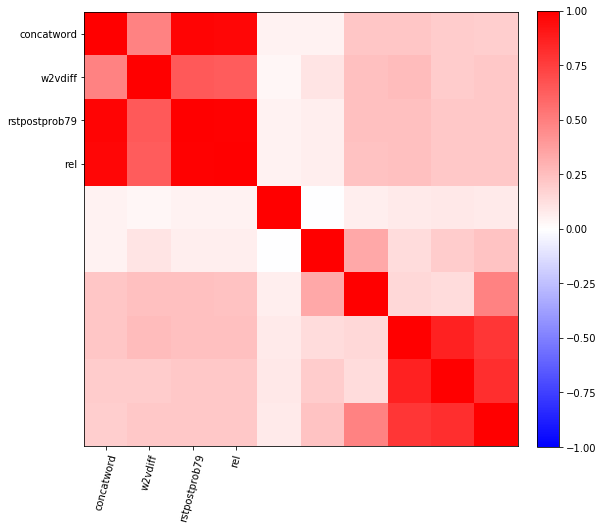

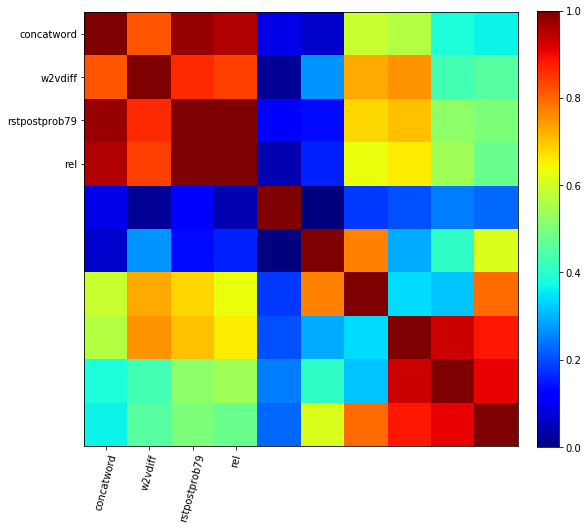

In [13]:
# Relationship between the models
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
# f, axarr = plt.subplots(1,3, figsize=(11, 8.5))
im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
            ax=ax, cb=False, cmap="bwr", mode="corr",
                 scale=False, rank=False, vmin=-1, vmax=1)
f.colorbar(im, fraction=0.046, pad=0.04)
ax.set_xticks(range(len(modelnames)))
ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames)
ax.set_xticklabels(modelnames, rotation=75)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman.png"))

f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
            ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
f.colorbar(im, fraction=0.046, pad=0.04)

ax.set_xticks(range(len(modelnames)))
ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames)
ax.set_xticklabels(modelnames, rotation=75)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman-ranked.png"))

# axarr[2].set_xticks(range(len(modelnames)))
# axarr[2].set_yticks(range(len(modelnames)))
# axarr[2].set_yticklabels(modelnames)
# axarr[2].set_xticklabels(modelnames, rotation=75)

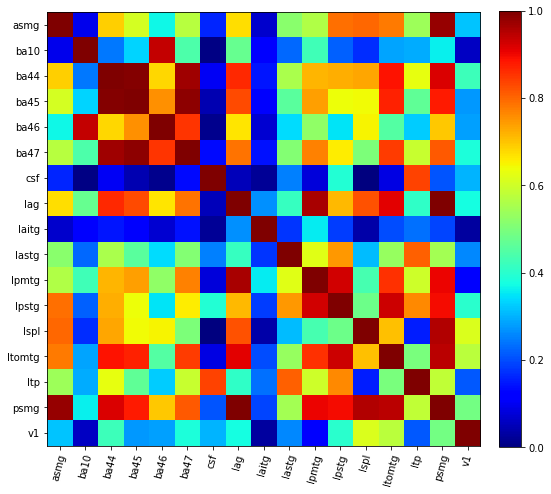

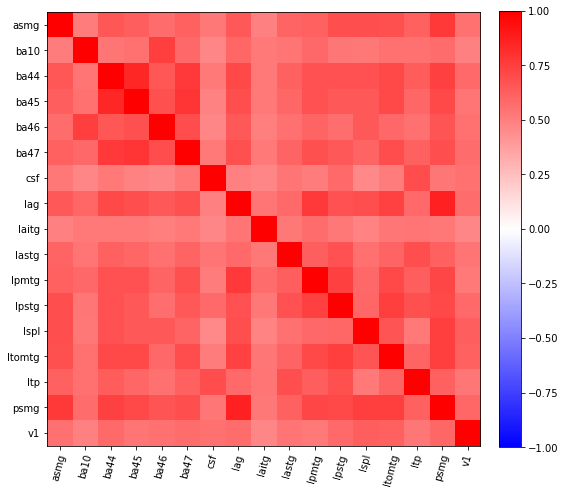

In [14]:
# Relationship between ROIs:
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
im = pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
# ax.set_title(b)
f.colorbar(im, fraction=0.046, pad=0.04)

roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)
# corr_rdms[corr_rdms.betatype==b]
# corr_rdms.groupby(["betatype", "roi"]).mean().T.corr()
f.savefig(os.path.join(paths["cloud"], "Figures", "{}-roi-corrs-spearman-ranked.png".format(b)))


# Relationship between ROIs:
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
im = pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, cb=True, cmap="bwr", mode="corr", scale=False, rank=False, vmin=-1, vmax=1)
# ax.set_title(b)

roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)
# corr_rdms[corr_rdms.betatype==b]
# corr_rdms.groupby(["betatype", "roi"]).mean().T.corr()
f.savefig(os.path.join(paths["cloud"], "Figures", "{}-roi-corrs-spearman.png".format(b)))


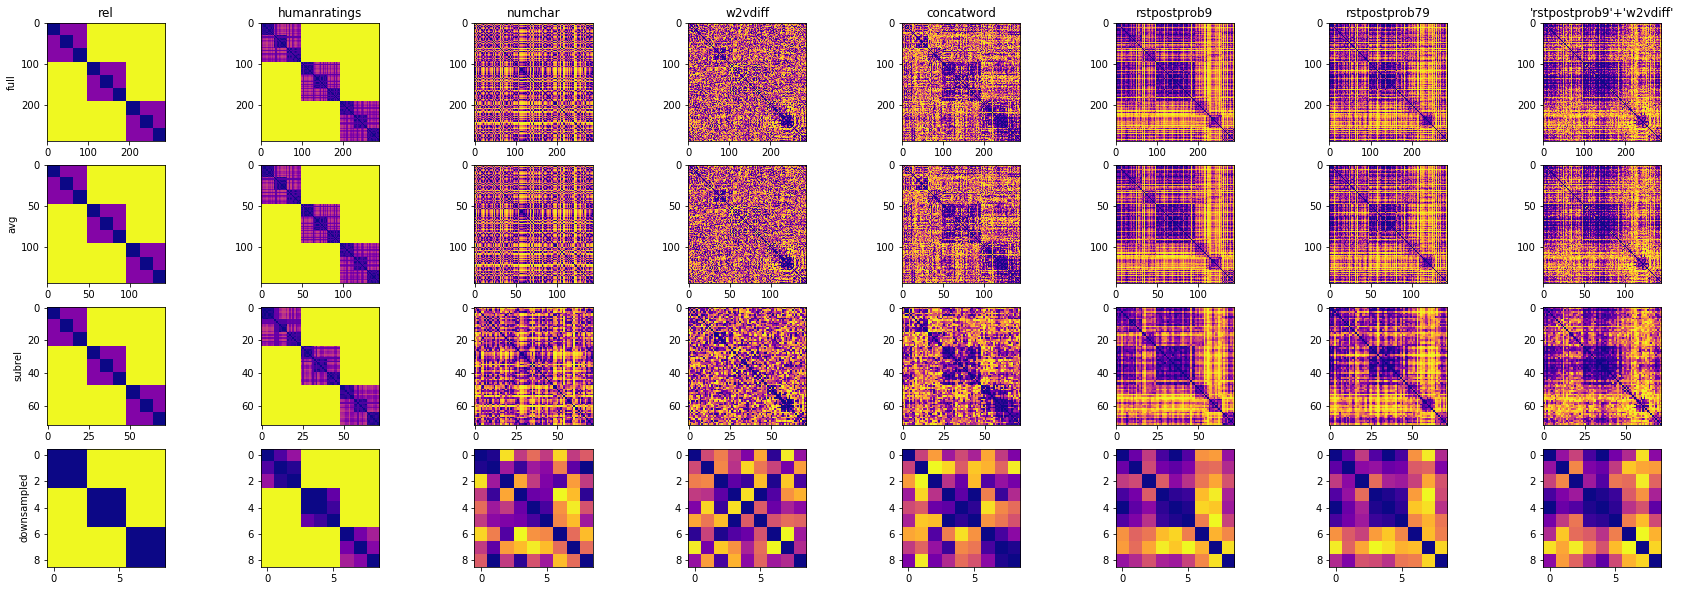

In [52]:
plotmodels(model_rdms, save=False)

## ROI Analysis
- Directly running spearman correlation between RDMs and model



In [15]:
# b = "cope-LSS"
try:
    corr_df = pd.read_csv(os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_{}.csv".format(b)))
#     corr_ds_df = pd.read_csv(os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_ds.csv"))

except FileNotFoundError:
    analysis = []
    corr_df = run_rsa_dfs(full_rdms, model_rdms[model_rdms.type=="avg"].dropna(axis=1))
    analysis += ["full" for _ in range(len(corr_df))]

    corr_df.to_csv(
        os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_{}.csv".format(b)),
        index=False
    )

In [16]:
corrgp = corr_df.groupby(["betatype", "roi"])
corrgp.mean()

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                            
cope-LSS asmg    0.009179  0.002254  0.008551      0.008440 -0.006409   
         ba10    0.006550 -0.003379  0.005051      0.004097 -0.015055   
         ba44    0.022157  0.012431  0.022115      0.022019  0.001697   
         ba45    0.023159  0.011106  0.022717      0.022149 -0.005631   
         ba46    0.006953 -0.003932  0.005289      0.004839 -0.014647   
         ba47    0.017338  0.007898  0.016920      0.017322 -0.003170   
         csf     0.000930 -0.013744 -0.002078     -0.002570 -0.000904   
         lag     0.018351  0.007761  0.017782      0.017775 -0.005707   
         laitg   0.001585 -0.016518 -0.002086     -0.002487 -0.012293   
         lastg   0.003648 -0.005637  0.002021      0.001091 -0.002035   
         lpmtg   0.010703 -0.001058  0.009194      0.009004 -0.008316   
         lpstg   0.018909  0.004691  0.017626      0.016704 -0.004416   
         lspl    0.006733  0.000056  0.005935      0.006462  0.000210   
         ltomtg  0.030170  0.017811  0.030299      0.029533  0.000799   
         ltp     0.005925 -0.006291  0.003887      0.003231 -0.004086   
         psmg    0.014905  0.004644  0.014093      0.013921 -0.007090   
         v1      0.006706 -0.004249  0.005005      0.004058  0.045688   

                  w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                         
cope-LSS asmg    0.010167    0.005654      0.008672       0.012729   
         ba10   -0.001125   -0.003870      0.004016      -0.001007   
         ba44    0.008296    0.012053      0.016587       0.014327   
         ba45    0.007580    0.015500      0.017271       0.015063   
         ba46   -0.000119    0.001127      0.008692       0.003464   
         ba47    0.004463    0.003482      0.009997       0.013321   
         csf    -0.000616   -0.008512      0.002224       0.000598   
         lag     0.003434    0.010719      0.007832       0.009459   
         laitg   0.003582   -0.004810      0.000522       0.000144   
         lastg   0.003013   -0.000565     -0.002470      -0.002031   
         lpmtg   0.004863    0.000177      0.004631       0.004905   
         lpstg   0.004718   -0.002111      0.010244       0.010076   
         lspl    0.006824    0.007288      0.024404       0.024813   
         ltomtg  0.009818    0.014192      0.027347       0.025520   
         ltp     0.005346   -0.006266      0.003866       0.002270   
         psmg    0.008043    0.007198      0.010051       0.011287   
         v1      0.003635    0.008327      0.026019       0.023602   

                 'rstpostprob79'+'concatword'     upper     lower  
betatype roi                                                       
cope-LSS asmg                        0.005494  0.425848  0.278597  
         ba10                       -0.004605  0.401840  0.250124  
         ba44                        0.015986  0.429783  0.284580  
         ba45                        0.018786  0.444057  0.301446  
         ba46                        0.008166  0.414574  0.262548  
         ba47                        0.008890  0.472963  0.332794  
         csf                        -0.002597  0.453037  0.321954  
         lag                         0.005255  0.392472  0.235645  
         laitg                      -0.001012  0.542592  0.406244  
         lastg                      -0.007074  0.479529  0.337348  
         lpmtg                      -0.002618  0.500974  0.365058  
         lpstg                      -0.002814  0.477328  0.337486  
         lspl                        0.022519  0.355616  0.187350  
         ltomtg                      0.019423  0.447952  0.303358  
         ltp                        -0.004975  0.496165  0.366487  
         psmg                        0.006117  0.406738  0.253130  
         v1                          0.030447  0.474698  0.354831

In [17]:
corrgp.std()/np.sqrt(15)

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                            
cope-LSS asmg    0.002849  0.002681  0.002833      0.002730  0.004594   
         ba10    0.002530  0.002010  0.002485      0.002618  0.006416   
         ba44    0.004091  0.003831  0.004190      0.004253  0.005563   
         ba45    0.004281  0.004094  0.004306      0.004310  0.004834   
         ba46    0.003415  0.002582  0.003367      0.003473  0.005878   
         ba47    0.003868  0.004432  0.004151      0.004306  0.006939   
         csf     0.002369  0.002208  0.002238      0.002178  0.003502   
         lag     0.003762  0.002877  0.003636      0.003736  0.005201   
         laitg   0.001974  0.001834  0.001985      0.002126  0.003213   
         lastg   0.002691  0.002543  0.002697      0.002709  0.003940   
         lpmtg   0.002512  0.002522  0.002616      0.002473  0.004230   
         lpstg   0.004771  0.003159  0.004723      0.004642  0.003758   
         lspl    0.002337  0.001935  0.002309      0.002425  0.006346   
         ltomtg  0.006238  0.005371  0.006471      0.006346  0.005821   
         ltp     0.002724  0.002549  0.002693      0.002712  0.004046   
         psmg    0.002464  0.002027  0.002315      0.002521  0.006187   
         v1      0.001505  0.001281  0.001445      0.001584  0.010192   

                  w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                         
cope-LSS asmg    0.002200    0.003302      0.005019       0.004922   
         ba10    0.001770    0.002973      0.007864       0.007147   
         ba44    0.002105    0.004786      0.011373       0.009718   
         ba45    0.002381    0.004486      0.008508       0.007860   
         ba46    0.002061    0.004739      0.005299       0.005659   
         ba47    0.002950    0.004272      0.008065       0.008032   
         csf     0.001899    0.002210      0.004211       0.003869   
         lag     0.001728    0.004348      0.006192       0.006241   
         laitg   0.001954    0.003063      0.004045       0.003412   
         lastg   0.002529    0.003123      0.006030       0.004991   
         lpmtg   0.002424    0.004061      0.007015       0.006092   
         lpstg   0.002110    0.003095      0.009632       0.007990   
         lspl    0.001916    0.004125      0.007448       0.006801   
         ltomtg  0.001599    0.004643      0.011268       0.009409   
         ltp     0.002261    0.002057      0.007379       0.006597   
         psmg    0.001994    0.003084      0.006004       0.006483   
         v1      0.001462    0.002561      0.007961       0.006305   

                 'rstpostprob79'+'concatword'     upper     lower  
betatype roi                                                       
cope-LSS asmg                        0.005359  0.013103  0.021395  
         ba10                        0.006633  0.013367  0.019933  
         ba44                        0.010743  0.011466  0.018951  
         ba45                        0.008584  0.009981  0.016725  
         ba46                        0.005161  0.010721  0.017241  
         ba47                        0.007764  0.008461  0.011541  
         csf                         0.004073  0.011572  0.027478  
         lag                         0.007099  0.011808  0.017051  
         laitg                       0.004240  0.006484  0.007408  
         lastg                       0.006429  0.010037  0.017613  
         lpmtg                       0.007964  0.009328  0.014703  
         lpstg                       0.008467  0.011634  0.016858  
         lspl                        0.007180  0.012329  0.015593  
         ltomtg                      0.009421  0.014586  0.019882  
         ltp                         0.006584  0.007722  0.022929  
         psmg                        0.006719  0.013934  0.021146  
         v1                          0.007809  0.021244  0.025852

In [19]:
corrgp.mean() - 2.3 * corrgp.std()/np.sqrt(15)

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                            
cope-LSS asmg    0.002627 -0.003912  0.002036      0.002161 -0.016975   
         ba10    0.000730 -0.008002 -0.000664     -0.001924 -0.029812   
         ba44    0.012748  0.003620  0.012477      0.012237 -0.011098   
         ba45    0.013312  0.001689  0.012813      0.012237 -0.016748   
         ba46   -0.000901 -0.009871 -0.002454     -0.003148 -0.028167   
         ba47    0.008443 -0.002295  0.007373      0.007418 -0.019129   
         csf    -0.004519 -0.018822 -0.007224     -0.007579 -0.008960   
         lag     0.009698  0.001145  0.009419      0.009183 -0.017669   
         laitg  -0.002954 -0.020736 -0.006653     -0.007377 -0.019683   
         lastg  -0.002541 -0.011486 -0.004183     -0.005139 -0.011096   
         lpmtg   0.004926 -0.006858  0.003179      0.003316 -0.018044   
         lpstg   0.007935 -0.002574  0.006763      0.006028 -0.013059   
         lspl    0.001356 -0.004395  0.000626      0.000884 -0.014385   
         ltomtg  0.015822  0.005459  0.015414      0.014938 -0.012590   
         ltp    -0.000340 -0.012154 -0.002306     -0.003006 -0.013392   
         psmg    0.009237 -0.000018  0.008769      0.008122 -0.021319   
         v1      0.003243 -0.007195  0.001681      0.000415  0.022246   

                  w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                         
cope-LSS asmg    0.005107   -0.001941     -0.002872       0.001408   
         ba10   -0.005197   -0.010708     -0.014071      -0.017446   
         ba44    0.003454    0.001045     -0.009570      -0.008024   
         ba45    0.002104    0.005183     -0.002296      -0.003015   
         ba46   -0.004859   -0.009774     -0.003496      -0.009552   
         ba47   -0.002322   -0.006342     -0.008552      -0.005153   
         csf    -0.004984   -0.013595     -0.007461      -0.008302   
         lag    -0.000541    0.000718     -0.006409      -0.004895   
         laitg  -0.000912   -0.011855     -0.008780      -0.007705   
         lastg  -0.002805   -0.007749     -0.016339      -0.013511   
         lpmtg  -0.000711   -0.009162     -0.011503      -0.009107   
         lpstg  -0.000134   -0.009229     -0.011911      -0.008302   
         lspl    0.002417   -0.002199      0.007274       0.009170   
         ltomtg  0.006142    0.003514      0.001431       0.003878   
         ltp     0.000145   -0.010996     -0.013106      -0.012903   
         psmg    0.003456    0.000106     -0.003757      -0.003623   
         v1      0.000271    0.002436      0.007708       0.009102   

                 'rstpostprob79'+'concatword'     upper     lower  
betatype roi                                                       
cope-LSS asmg                       -0.006831  0.395711  0.229389  
         ba10                       -0.019861  0.371097  0.204278  
         ba44                       -0.008723  0.403410  0.240993  
         ba45                       -0.000957  0.421101  0.262978  
         ba46                       -0.003703  0.389916  0.222894  
         ba47                       -0.008966  0.453503  0.306251  
         csf                        -0.011966  0.426422  0.258754  
         lag                        -0.011073  0.365313  0.196427  
         laitg                      -0.010764  0.527680  0.389206  
         lastg                      -0.021860  0.456444  0.296839  
         lpmtg                      -0.020935  0.479519  0.331241  
         lpstg                      -0.022287  0.450569  0.298713  
         lspl                        0.006005  0.327260  0.151486  
         ltomtg                     -0.002246  0.414405  0.257629  
         ltp                        -0.020119  0.478403  0.313751  
         psmg                       -0.009338  0.374688  0.204495  
         v1                          0.012486  0.425837  0.295371

In [52]:
# test whether difference of means is significant.

from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

m = "lspl"

# print(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
# print(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
# print(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
# print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
# print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
# print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])


pvals = []
pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])
pvals.append(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
pvals.append(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
pvals.append(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])
pvals.append(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])


multipletests(pvals, method="fdr_bh")

(array([False, False,  True,  True, False, False, False]),
 array([0.89770596, 0.89770596, 0.04676859, 0.04676859, 0.0527763 ,
        0.0527763 , 0.9165564 ]),
 0.007300831979014655,
 0.0071428571428571435)

In [23]:

tvalues, pvalues, corr_p = {"roi":[]}, {"roi":[]}, {"roi":[]}
for model in ["w2vdiff", "concatword", "rstpostprob9"]:
#     tvalues[model] = []
    pvalues[model] = []
    for roi in corr_df.roi.unique():

#         t = rsa.wilcoxon(corr_df[model][corr_df.roi == roi])
#         tvalues[model].append(t.statistic)
#         pvalues[model].append(t.pvalue)
        
        pvalues[model].append(
            rsa.wilcoxon_onesided(
                corr_df[model][corr_df.roi == roi]
            ))
    corr_p[model] = multipletests(pvalues[model])[1]

tvalues["roi"] = [roi for roi in corr_df.roi.unique()]
pvalues["roi"] = [roi for roi in corr_df.roi.unique()]
corr_p["roi"] = [roi for roi in corr_df.roi.unique()]


In [24]:
pd.DataFrame(corr_p)

,roi,w2vdiff,concatword,rstpostprob9
0,ba10,0.926929,0.999735,0.944116
1,ba44,0.020116,0.148868,0.643074
2,ba45,0.020116,0.043569,0.394163
3,ba46,0.926929,0.992188,0.674211
4,ba47,0.318520,0.798241,0.674211
5,lpstg,0.201638,0.998909,0.944116
6,laitg,0.270026,0.999735,0.944116
7,lpmtg,0.201638,0.986849,0.886810
8,ltp,0.198356,0.999957,0.944116
9,ltomtg,0.005452,0.107361,0.093624


In [57]:
pd.DataFrame(pvalues)

,roi,w2vdiff,concatword,rstpostprob79
0,ba10,0.795978,0.872355,0.418069
1,ba44,0.001354,0.011447,0.039365
2,ba45,0.001354,0.002617,0.035163
3,ba46,0.581931,0.500000,0.204022
4,ba47,0.073830,0.162935,0.054470
5,lpstg,0.024711,0.732537,0.162935
6,laitg,0.043968,0.918663,0.621816
7,lpmtg,0.024711,0.418069,0.732537
8,ltp,0.021866,0.993468,0.520620
9,ltomtg,0.000322,0.007543,0.004180


In [10]:
corr_df["rstpostprob79"][corr_df.roi == "ba44"]

1     -0.000968
16    -0.063856
31     0.076907
46     0.089592
61     0.025048
76     0.011314
91     0.002395
106    0.026640
121    0.007890
136   -0.004024
151   -0.007880
166    0.016909
181   -0.038663
196    0.015341
211    0.025095
226    0.047496
Name: rstpostprob79, dtype: float64

In [40]:

tvalues, pvalues, corr_p = {}, {}, {}


for roi in corr_df.roi.unique():
#     tvalues[model] = []
    pvalues[roi] = []
    for model in ["w2vdiff", "concatword", "rstpostprob79", "rel"]:
#         t = rsa.wilcoxon(corr_df[model][corr_df.roi == roi])
#         tvalues[model].append(t.statistic)
#         pvalues[model].append(t.pvalue)
        
        pvalues[roi].append(
            rsa.wilcoxon_onesided(
                corr_df[model][corr_df.roi == roi]
            ))
    corr_p[roi] = multipletests(pvalues[roi])[1]

tvalues["model"] = ["w2vdiff", "concatword", "rstpostprob79", "rel"]
pvalues["model"] = ["w2vdiff", "concatword", "rstpostprob79", "rel"]
corr_p["model"] = ["w2vdiff", "concatword", "rstpostprob79", "rel"]
# tvalues["roi"] = [roi for roi in corr_df.roi.unique()]
# pvalues["roi"] = [roi for roi in corr_df.roi.unique()]
# corr_p["roi"] = [roi for roi in corr_df.roi.unique()]

In [41]:
pd.DataFrame(corr_p).T[:-1]

,0,1,2,3
ba10,0.958375,0.958375,0.802933,0.119573
ba44,0.00405607,0.0227637,0.0393654,0.00155192
ba45,0.00405607,0.00522706,0.0351629,0.00155192
ba46,0.75,0.75,0.495684,0.24181
ba47,0.154672,0.162935,0.154672,0.00639378
lpstg,0.0723161,0.732537,0.299322,0.00106206
laitg,0.164608,0.952046,0.945911,0.952046
lpmtg,0.0723161,0.661357,0.732537,0.0104268
ltp,0.0846385,0.993468,0.770194,0.24495
ltomtg,0.000964252,0.00834318,0.00834318,0.000875267


In [42]:
pvalues["ba44"]

[0.0013538538590129523,
 0.011447392091562291,
 0.03936540559806701,
 0.00038820574953187426]

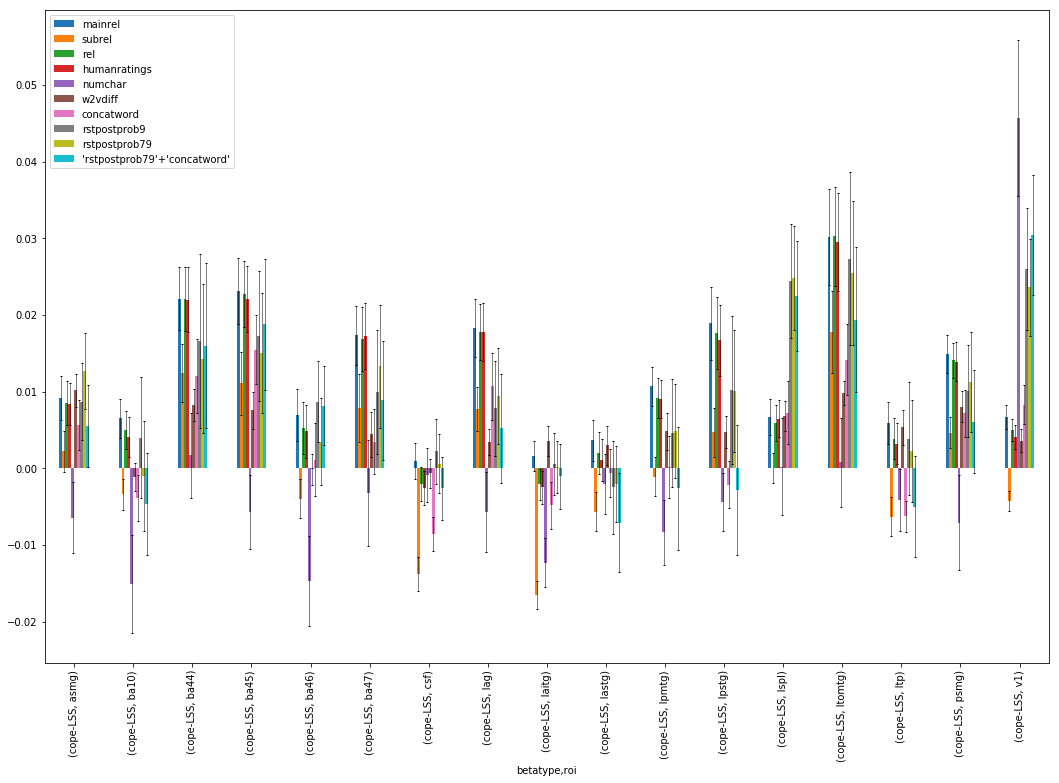

In [25]:
# DO NOT RUN
# cope Results
corrgp=corr_df.groupby(["betatype", "roi"])
ax = plot_results(corrgp)